# Problem Statement

Predicting Shopping Mall Sales. You will have to create model to predict revenue. Identify the model with best params. Target Column - Revenue. Data Link - https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/Shopping_Revenue.csv

## Importing basic libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [36]:
link = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/Shopping_Revenue.csv"
df = pd.read_csv(link, index_col = "Id")
df.head(5)

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,
0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2.0,...,3.0,5,3,4,5,5,4,3,4,5653753
1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2.0,...,3.0,0,0,0,0,0,0,0,0,6923131
2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3.0,...,3.0,0,0,0,0,0,0,0,0,2055379
3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4.0,...,7.5,25,12,10,6,18,12,12,6,2675511
4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2.0,...,3.0,5,1,3,2,3,4,3,3,4316715


# Exploratory Data Analysis 

## Understanding DataFrame Structure

In [13]:
df.shape

(137, 42)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open Date   137 non-null    object 
 1   City        137 non-null    object 
 2   City Group  137 non-null    object 
 3   Type        137 non-null    object 
 4   P1          137 non-null    int64  
 5   P2          137 non-null    float64
 6   P3          137 non-null    float64
 7   P4          137 non-null    float64
 8   P5          137 non-null    int64  
 9   P6          133 non-null    float64
 10  P7          133 non-null    float64
 11  P8          137 non-null    int64  
 12  P9          137 non-null    int64  
 13  P10         137 non-null    int64  
 14  P11         137 non-null    int64  
 15  P12         137 non-null    int64  
 16  P13         137 non-null    float64
 17  P14         137 non-null    int64  
 18  P15         137 non-null    int64  
 19  P16         137 non-null    i

- converting 'Open Date' into year as no point of using pandas.datetime object as no algorithm can work on it

In [37]:
df["Open Year"] = df["Open Date"].apply(lambda x: int(x[len(x): len(x) - 5:-1][::-1]))
df = df.drop(labels = "Open Date", axis = 1)
df["Open Year"]

Id
0      1999
1      2008
2      2013
3      2012
4      2009
       ... 
132    2008
133    2006
134    2006
135    2010
136    2009
Name: Open Year, Length: 137, dtype: int64

## Categorical Data Analysis

- We have 3 categorical variables. 'City', 'City Group' and 'Type'

In [38]:
df["City"].nunique()

34

In [42]:
df["City Group"].unique()

array(['Big Cities', 'Other'], dtype=object)

In [43]:
df["Type"].unique()

array(['IL', 'FC', 'DT'], dtype=object)

In [47]:
pd.crosstab(df["City"], df["City Group"], margins = True)

City Group,Big Cities,Other,All
City,,,
Adana,0,3,3
Afyonkarahisar,0,1,1
Amasya,0,1,1
Ankara,19,0,19
Antalya,0,4,4
Aydın,0,2,2
Balıkesir,0,1,1
Bolu,0,1,1
Bursa,0,5,5


- each "City" is either classified as "Big Cities" or "Other". i,e. There is a heirarchy of variables among 'City Type'(parent) and 'City'(Child) 

In [49]:
pd.crosstab(df["Type"], df["City Group"], margins = True)

City Group,Big Cities,Other,All
Type,,,
DT,1,0,1
FC,39,37,76
IL,38,22,60
All,78,59,137


- Only one ocurrence of the category 'DT' in categorical variable 
- No apparent relation among the variable 'City Group' and 'Type'.
- It seems variable 'Type' is related to particular store rather than it's 'City Group'

In [52]:
pd.crosstab(df["City"], df["Type"], margins = True)

Type,DT,FC,IL,All
City,,,,
Adana,0,0,3,3
Afyonkarahisar,0,0,1,1
Amasya,0,0,1,1
Ankara,1,10,8,19
Antalya,0,4,0,4
Aydın,0,2,0,2
Balıkesir,0,0,1,1
Bolu,0,1,0,1
Bursa,0,4,1,5


- No apparent relation among the variable 'City' and 'Type'.
- It seems variable 'Type' is related to particular store rather than it's 'City'

## Preprocssing

- Some algorithms like linear regression expect categorical variables to be one hot vectorized
- so creating seperate dataframe with categorical variables in one hot vectorized format

In [102]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(df[["City","City Group", "Type"]])
temp_columns = []
for i in ohe.categories_:
    temp_columns += list(i)

In [103]:
temp = pd.DataFrame(ohe.transform(df[["City","City Group", "Type"]]).toarray(), columns = temp_columns, index = df["City"].index)

In [104]:
df_1 = df.drop(labels = ["City","City Group", "Type"], axis = 1)

In [106]:
df_1 = pd.concat([temp, df_1], axis = 1)

In [109]:
df_1 = df_1.drop(labels = ["DT", "Other"], axis = 1)#as they add redundent infotmation 

In [111]:
df_1["City Group - Big Cities"],df_1["Type - FC"], df_1["Type - IL"]= df_1["Big Cities"], df_1["FC"], df_1["IL"] 

In [112]:
df_1 = df_1.drop(labels = ["Big Cities", "FC", "IL"], axis = 1)

In [114]:
df_1.columns

Index(['Adana', 'Afyonkarahisar', 'Amasya', 'Ankara', 'Antalya', 'Aydın',
       'Balıkesir', 'Bolu', 'Bursa', 'Denizli', 'Diyarbakır', 'Edirne',
       'Elazığ', 'Eskişehir', 'Gaziantep', 'Isparta', 'Karabük', 'Kastamonu',
       'Kayseri', 'Kocaeli', 'Konya', 'Kütahya', 'Kırklareli', 'Muğla',
       'Osmaniye', 'Sakarya', 'Samsun', 'Tekirdağ', 'Tokat', 'Trabzon', 'Uşak',
       'İstanbul', 'İzmir', 'Şanlıurfa', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6',
       'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue', 'Open Year', 'City Group - Big Cities', 'Type - FC',
       'Type - IL'],
      dtype='object')

## Handling Missing values

In [17]:
df.isnull().sum()

Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            4
P7            4
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [53]:
df["P6"][df["P6"].isnull()]

Id
15   NaN
32   NaN
57   NaN
86   NaN
Name: P6, dtype: float64

In [54]:
df["P7"][df["P7"].isnull()]

Id
20   NaN
42   NaN
82   NaN
86   NaN
Name: P7, dtype: float64

In [55]:
df.shape

(137, 42)

- Only 8 missing values in a 137* 42 grid of data.
- With data samples being limited one can't take the risk of dropping entries with missing data.
- one way to deal with this is to use pd.fillna() method of pandas package to impute mean of the column, but it too can lead to a information loss.
- better option would be to train a simple ML model using other row entries, where values with missing columns would be target column and rest of the columns would be used as features.

### Training model with target column as "P6" for imputing 4 missing entries

#### splitting data in train and test dataset

In [115]:
train_impute = df_1.drop(labels = [15, 32, 57, 86, 20, 42, 82]) #[15, 32, 57, 86, 20, 42, 82] are the ids of the rows with missing data

In [116]:
train_impute.shape

(130, 76)

In [117]:
train_impute.head(2)

,Adana,Afyonkarahisar,Amasya,Ankara,Antalya,Aydın,Balıkesir,Bolu,Bursa,Denizli,...,P33,P34,P35,P36,P37,revenue,Open Year,City Group - Big Cities,Type - FC,Type - IL
Id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,5,4,3,4,5653753,1999,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,6923131,2008,1.0,1.0,0.0


In [142]:
test_impute_1 = df_1.loc[[15, 32, 57, 86], :].copy() ## rows with missing values for column "P6", the rows we want to impute missing data

In [143]:
test_impute_1.shape

(4, 76)

In [144]:
test_impute_1["P6"]

Id
15   NaN
32   NaN
57   NaN
86   NaN
Name: P6, dtype: float64

#### Splitting data into target and features

In [122]:
X_train_impute_1 = train_impute.drop(labels = "P6", axis = 1)
Y_train_impute_1 = train_impute["P6"]
X_test_impute_1 = test_impute_1.drop(labels = "P6", axis = 1)

In [123]:
X_train_impute_1.shape

(130, 75)

In [124]:
Y_train_impute_1.shape

(130,)

In [125]:
X_test_impute_1.shape

(4, 75)

#### Training Linear Regression model

In [126]:
from sklearn.linear_model import LinearRegression
model_impute_1 = LinearRegression(fit_intercept = True)
model_impute_1.fit(X_train_impute_1, Y_train_impute_1)

LinearRegression()

In [132]:
X_test_impute_1["P7"][86] = X_train_impute_1["P7"].mean()

<ipython-input-132-1101f858eb5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_impute_1["P7"][86] = X_train_impute_1["P7"].mean()


In [138]:
model_impute_1.predict(X_test_impute_1)

array([ 1.33747125e+01, -4.82190595e+06,  3.01437818e+00,  1.24723446e+00])

- particular model is giving very high values, all those numerical columns must contain redundent information and high multi-collinearity, that's why it is overfitting


### Training model with target column as "P7" for imputing 4 missing entries

#### splitting data in train and test dataset

In [139]:
train_impute.shape# already have train data from earlier model

(130, 76)

In [141]:
test_impute_2 = df_1.loc[[20, 42, 82, 86], :].copy() ## rows with missing values for column "P7", the rows we want to impute missing data
test_impute_2.shape

(4, 76)

In [146]:
test_impute_2["P7"]

Id
20   NaN
42   NaN
82   NaN
86   NaN
Name: P7, dtype: float64

#### Splitting data into target and features

In [147]:
X_train_impute_2 = train_impute.drop(labels = "P7", axis = 1)
Y_train_impute_2 = train_impute["P7"]
X_test_impute_2 = test_impute_2.drop(labels = "P7", axis = 1)

In [148]:
X_train_impute_2.shape

(130, 75)

In [149]:
Y_train_impute_2.shape

(130,)

In [150]:
X_test_impute_2.shape

(4, 75)

#### Training Linear Regreesion model

In [151]:
model_impute_2 = LinearRegression(fit_intercept = True)
model_impute_2.fit(X_train_impute_2, Y_train_impute_2)

LinearRegression()

In [152]:
X_test_impute_2["P6"][86] = X_train_impute_2["P6"].mean()

<ipython-input-152-55f1b91296c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_impute_2["P6"][86] = X_train_impute_2["P6"].mean()


In [153]:
model_impute_2.predict(X_test_impute_2)

array([-3.04966442e+06,  9.39732470e+00, -3.04966729e+06,  5.91485815e+00])

In [156]:
-3.04966442e+06

-3049664.42

- particular model is giving very high values, all those numerical columns must contain redundent information and high multi-collinearity, that's why it is overfitting.
- using mean values for missing value imputation

### Imputing mean values instead

In [163]:
df["P6"] = df["P6"].fillna(df["P6"].mean())
df["P6"].isnull().sum()

0

In [164]:
df["P7"] = df["P7"].fillna(df["P7"].mean())
df["P7"].isnull().sum()

0

In [165]:
df_1["P6"] = df_1["P6"].fillna(df_1["P6"].mean())
df_1["P6"].isnull().sum()

0

In [166]:
df_1["P7"] = df_1["P7"].fillna(df_1["P7"].mean())
df_1["P7"].isnull().sum()

0

# Visualization

## Heatmap of correlation matrix

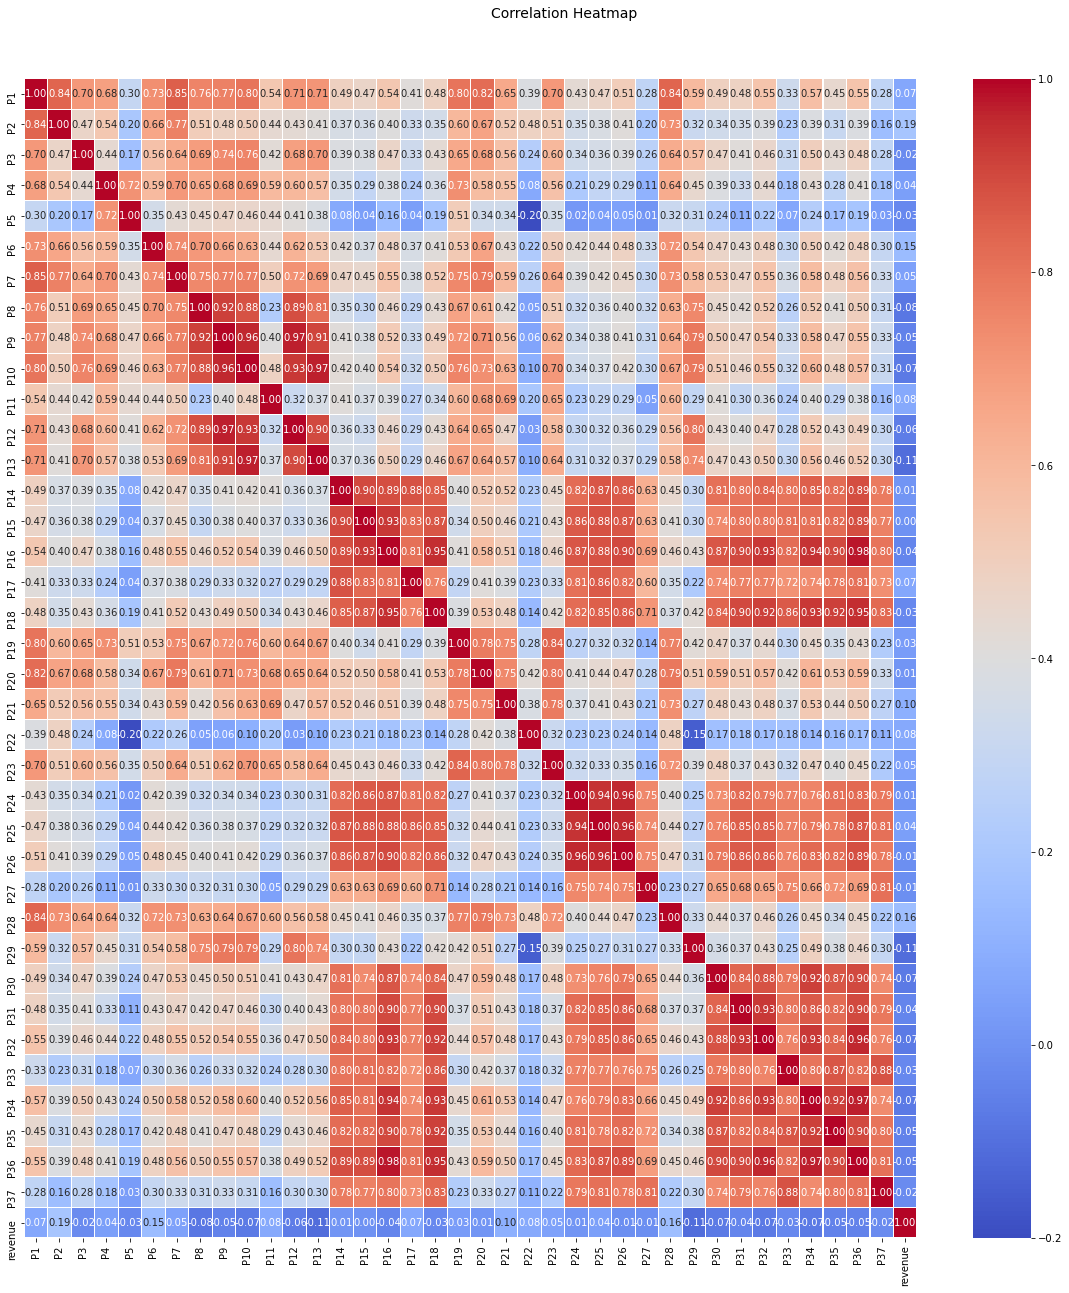

In [16]:
temp_df = df

#plot details
title_string = 'Correlation Heatmap'
title_font = 14

f, ax = plt.subplots(figsize=(20, 20))
corr = temp_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle(title_string, fontsize = title_font)

# Rough Work

## Trying PCA on some features

In [174]:
from sklearn.decomposition import PCA

In [324]:
df.columns[3:40]

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36', 'P37'],
      dtype='object')

In [325]:
temp = df.iloc[:, 3:40]

In [328]:
for i in range(1, 15):
    temp_pca_model = PCA(n_components = i)
    temp_pca_model.fit(temp)
    print("Explained Variance using {0} components = {1}%".format(i, round(sum(temp_pca_model.explained_variance_ratio_) * 100, 2)))

Explained Variance using 1 components = 65.94%
Explained Variance using 2 components = 82.63%
Explained Variance using 3 components = 85.79%
Explained Variance using 4 components = 88.21%
Explained Variance using 5 components = 89.87%
Explained Variance using 6 components = 91.46%
Explained Variance using 7 components = 92.77%
Explained Variance using 8 components = 93.73%
Explained Variance using 9 components = 94.58%
Explained Variance using 10 components = 95.27%
Explained Variance using 11 components = 95.86%
Explained Variance using 12 components = 96.42%
Explained Variance using 13 components = 96.84%
Explained Variance using 14 components = 97.25%


## Trying adding all "P" columns

In [204]:
df.iloc[:, 3:40].values.sum(axis = 1).shape

(137,)

In [209]:
df_sum_p = pd.DataFrame(df.iloc[:, 3:40].values.sum(axis = 1), index = df.index, columns = ["P_sum"])

In [223]:
pd.concat([df_sum_p, df["revenue"]], axis = 1).corr(method = "spearman")

,P_sum,revenue
P_sum,1.00000,0.26358
revenue,0.26358,1.00000


## Trying Multiplying all "P" columns

In [222]:
np.multiply.reduce(df.iloc[:, 3:40].T).shape

(137,)

In [224]:
df_prod_p = pd.DataFrame(np.multiply.reduce(df.iloc[:, 3:40].T), index = df.index, columns = ["P_prod"])

In [225]:
df_prod_p

,P_prod
Id,
0,4.777574e+17
1,0.000000e+00
2,0.000000e+00
3,1.096848e+30
4,2.015539e+15
...,...
132,0.000000e+00
133,0.000000e+00
134,0.000000e+00


In [233]:
pd.concat([df_prod_p, df["revenue"]], axis = 1).corr()

,P_prod,revenue
P_prod,1.000000,-0.058754
revenue,-0.058754,1.000000


In [231]:
df.iloc[1, 3:40]

P1       4
P2     5.0
P3     4.0
P4     4.0
P5       1
P6     2.0
P7     5.0
P8       5
P9       5
P10      5
P11      1
P12      5
P13    5.0
P14      0
P15      0
P16      0
P17      0
P18      0
P19      3
P20      2
P21      1
P22      3
P23      2
P24      0
P25      0
P26    0.0
P27    0.0
P28    3.0
P29    3.0
P30      0
P31      0
P32      0
P33      0
P34      0
P35      0
P36      0
P37      0
Name: 1, dtype: object

# Model meets data

## Splitting data into train and test

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
train_test_split?

In [238]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels = "revenue", axis = 1), df["revenue"], test_size = 0.2, random_state = 5)

In [239]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_1.drop(labels = "revenue", axis = 1), df_1["revenue"], test_size = 0.2, random_state = 5)

- "_1" means the train and test set with categorical embedded using one hot encoding

In [240]:
X_train.index == X_train_1.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

- because of the same randomstate they both X_train and X_train_1 have same ids, consequently same entries

## Linear Regression

- easiest to implement. 
- Fitting a linear hyperplane to the data with least squares error

In [235]:
lr_model = LinearRegression(fit_intercept = True)

In [241]:
lr_model.fit(X_train_1, y_train_1)

LinearRegression()

In [242]:
from sklearn.metrics import r2_score

In [243]:
y_lr_model = lr_model.predict(X_test_1)

In [245]:
r2_score(y_test_1, y_lr_model)

-7.266408723356193e+22

In [246]:
-7.266408723356193e+22

-7.266408723356193e+22

- I've never seen model this bad
- no point even trying to add bias to it by ridge/lasso regression

In [247]:
y_lr_model_train = lr_model.predict(X_train_1)
r2_score(y_train_1, y_lr_model_train)

0.5532383402825343

## KNN

### Using MinMaxXcalar first

In [353]:
from sklearn.preprocessing import MinMaxScaler

In [355]:
scalar = MinMaxScaler()

In [359]:
X_train_scaled = pd.DataFrame(scalar.fit_transform(X_train_1), index = X_train_1.index, columns = X_train_1.columns)

In [361]:
X_test_scaled = pd.DataFrame(scalar.fit_transform(X_test_1), index = X_test_1.index, columns = X_test_1.columns)

In [365]:
X_test_scaled.head(1)

,Adana,Afyonkarahisar,Amasya,Ankara,Antalya,Aydın,Balıkesir,Bolu,Bursa,Denizli,...,P32,P33,P34,P35,P36,P37,Open Year,City Group - Big Cities,Type - FC,Type - IL
Id,,,,,,,,,,,,,,,,,,,,,
57,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,1.0,0.0


### Fitting model

In [366]:
from sklearn.neighbors import KNeighborsRegressor

In [403]:
for i in range(1,16):
    knn_model = KNeighborsRegressor(n_neighbors = i)
    knn_model.fit(X_train_scaled, y_train_1)
    knn_y = knn_model.predict(X_test_scaled)
    print("r2 score with {0} neighbors :".format(i), round(r2_score(y_test_1, knn_y), 3))

r2 score with 1 neighbors : -0.931
r2 score with 2 neighbors : -0.382
r2 score with 3 neighbors : -0.021
r2 score with 4 neighbors : -0.092
r2 score with 5 neighbors : -0.083
r2 score with 6 neighbors : -0.043
r2 score with 7 neighbors : 0.065
r2 score with 8 neighbors : 0.063
r2 score with 9 neighbors : 0.067
r2 score with 10 neighbors : 0.069
r2 score with 11 neighbors : 0.042
r2 score with 12 neighbors : 0.057
r2 score with 13 neighbors : 0.077
r2 score with 14 neighbors : 0.051
r2 score with 15 neighbors : 0.047


- scores good as random guesses

- using less features

In [406]:
temp_X_train = X_train_scaled[['Open Year', 'City Group - Big Cities', 'Type - FC', 'Type - IL']]
temp_X_test = X_test_scaled[['Open Year', 'City Group - Big Cities', 'Type - FC', 'Type - IL']]

In [408]:
for i in range(1,25):
    knn_model = KNeighborsRegressor(n_neighbors = i)
    knn_model.fit(temp_X_train, y_train_1)
    knn_y = knn_model.predict(temp_X_test)
    print("r2 score with {0} neighbors :".format(i), round(r2_score(y_test_1, knn_y), 3))

r2 score with 1 neighbors : -0.361
r2 score with 2 neighbors : -0.193
r2 score with 3 neighbors : -0.005
r2 score with 4 neighbors : 0.075
r2 score with 5 neighbors : -0.012
r2 score with 6 neighbors : 0.059
r2 score with 7 neighbors : 0.091
r2 score with 8 neighbors : 0.132
r2 score with 9 neighbors : 0.23
r2 score with 10 neighbors : 0.247
r2 score with 11 neighbors : 0.215
r2 score with 12 neighbors : 0.205
r2 score with 13 neighbors : 0.229
r2 score with 14 neighbors : 0.272
r2 score with 15 neighbors : 0.298
r2 score with 16 neighbors : 0.296
r2 score with 17 neighbors : 0.254
r2 score with 18 neighbors : 0.245
r2 score with 19 neighbors : 0.212
r2 score with 20 neighbors : 0.209
r2 score with 21 neighbors : 0.191
r2 score with 22 neighbors : 0.175
r2 score with 23 neighbors : 0.244
r2 score with 24 neighbors : 0.229


## Decision Tree Regressor

In [256]:
from sklearn.tree import DecisionTreeRegressor

In [258]:
dtr_model = DecisionTreeRegressor()

In [260]:
dtr_model.fit(X_train_1, y_train_1)

DecisionTreeRegressor()

In [261]:
y_dtr_model = dtr_model.predict(X_test_1)

In [262]:
r2_score(y_test_1, y_dtr_model)

-0.37380918352533277

In [263]:
y_dtr_model_train = dtr_model.predict(X_train_1)
r2_score(y_train_1, y_dtr_model_train)

1.0

- clearly and overfit

### Hyperparameter tuning for add some bias to reduce variance

In [265]:
from sklearn.model_selection import GridSearchCV

In [309]:
grid = {
    "criterion": ["mse", "friedman_mse", "mae"],
    "max_depth": [i for i in range(2, 10)],
    "min_samples_split" : [i for i in range(2, 7)],
    "min_samples_leaf" : [i for i in range(1, 7)]
}

In [412]:
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid = grid, n_jobs = 2, cv = 5, verbose = 1)

In [315]:
grid_search.fit(X_train_1, y_train_1)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=2,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             verbose=1)

In [316]:
grid_search.best_params_

{'criterion': 'mae',
 'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [317]:
gs_dtr_y = grid_search.predict(X_test_1)
r2_score(y_test_1, gs_dtr_y)

0.16367206669669165

- still a very poor performer

- trying lesser features

In [329]:
temp_train = X_train_1[['Open Year', 'City Group - Big Cities', 'Type - FC', 'Type - IL']]

In [331]:
temp_test = X_test_1[['Open Year', 'City Group - Big Cities', 'Type - FC', 'Type - IL']]

In [332]:
grid_search.fit(temp_train, y_train_1)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=2,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             verbose=1)

In [333]:
grid_search.best_params_

{'criterion': 'mae',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [334]:
gs_dtr_y = grid_search.predict(temp_test)
r2_score(y_test_1, gs_dtr_y)

0.26125398875640693

- ironically reducing features has increased the performance of the model

### Trying with Scaled Features

In [410]:
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train_scaled, y_train_1)
y_dtr_model = dtr_model.predict(X_test_scaled)
r2_score(y_test_1, y_dtr_model)

-2.600665354363515

In [411]:
y_dtr_model_train = dtr_model.predict(X_train_scaled)
r2_score(y_train_1, y_dtr_model_train)

1.0

- Clearly an overfit again

- Trying hyperparameter tuning

In [413]:
grid = {
    "criterion": ["mse", "friedman_mse", "mae"],
    "max_depth": [i for i in range(2, 10)],
    "min_samples_split" : [i for i in range(2, 7)],
    "min_samples_leaf" : [i for i in range(1, 7)]
}

In [414]:
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid = grid, n_jobs = 2, cv = 5, verbose = 1)
grid_search.fit(X_train_scaled, y_train_1)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=2,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             verbose=1)

In [415]:
grid_search.best_params_

{'criterion': 'mae',
 'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [416]:
gs_dtr_y = grid_search.predict(X_test_scaled)
r2_score(y_test_1, gs_dtr_y)

-0.33011391278581614

- clearly MinMaxScaler hasn't improved it's performance

## RandomForest Regressor

In [335]:
from sklearn.ensemble import RandomForestRegressor

In [336]:
rf_model = RandomForestRegressor()

In [337]:
rf_model.fit(X_train_1, y_train_1)

RandomForestRegressor()

In [338]:
y_rf_model = rf_model.predict(X_test_1)

In [339]:
r2_score(y_test_1, y_rf_model)

0.1345889326459535

In [340]:
y_rf_model_train = rf_model.predict(X_train_1)
r2_score(y_train_1, y_rf_model_train)

0.8515114296144763

- possibility of overfit

### Hyperparameter tuning for add some bias to reduce variance

In [342]:
RandomForestRegressor?

In [343]:
grid = {
    "criterion": ["mse", "mae"],
    "max_depth": [i for i in range(2, 10)],
    "min_samples_split" : [i for i in range(2, 7)],
    "min_samples_leaf" : [i for i in range(1, 7)]
}

In [344]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid = grid, n_jobs = 2, cv = 5, verbose = 1)

In [345]:
grid_search.fit(X_train_1, y_train_1)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=2,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             verbose=1)

In [346]:
grid_search.best_params_

{'criterion': 'mae',
 'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [348]:
gs_rf_y = grid_search.predict(X_test_1)
r2_score(y_test_1, gs_rf_y)

0.26248173562359034